# Problem Statement

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

# Variables

1.Serial No. (Unique row ID)
2.GRE Scores (out of 340)
3.TOEFL Scores (out of 120)
4.University Rating (out of 5)
5.Statement of Purpose and Letter of Recommendation Strength (out of 5)
6.Undergraduate GPA (out of 10)
7.Research Experience (either 0 or 1)
8.Chance of Admit (ranging from 0 to 1)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv(r"C:\Users\Asus\Downloads\Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Basic analysis on data

In [42]:
#checking datatypes of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [43]:
#check for any null values in the data.
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [44]:
#Serial No column is not necessary for the analysis and even for building the linear regression model.
#Dropping serial no column from the dataframe
df.drop(columns='Serial No.',inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [45]:
#check for duplicates in the dataframe
df.duplicated().sum()
#no duplicate data in the dataframe.

0

# Univariante Analysis

In [46]:
##Get the statistics for each columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


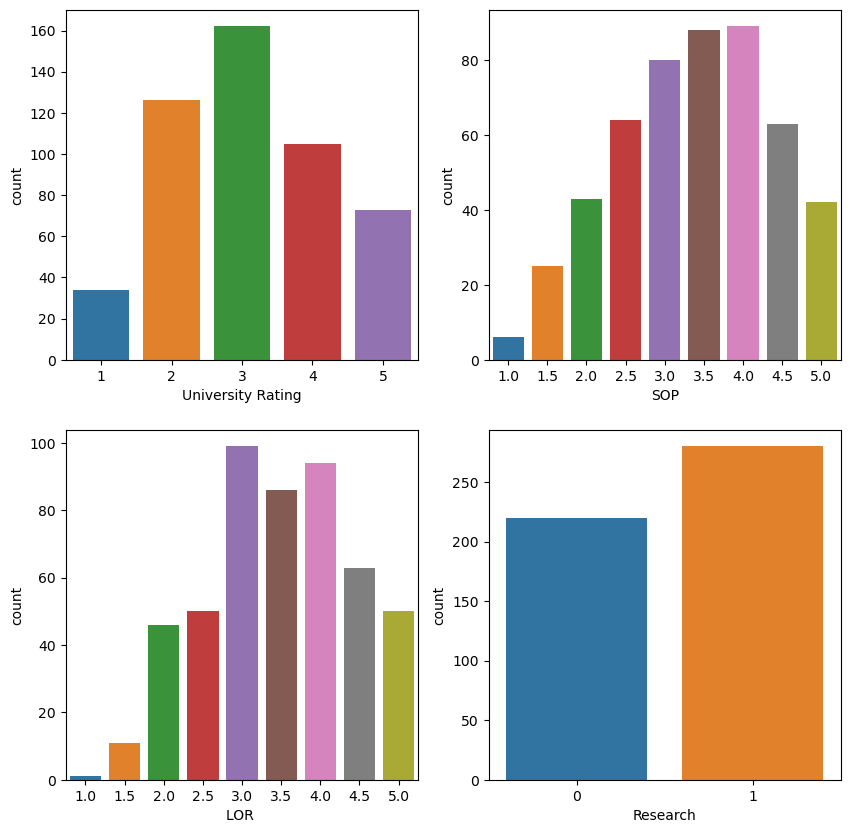

In [47]:
###doing countplot for the categorical variables and histplot for the nominal variables to understand the distribution of the data
n=1
plt.figure(figsize=(10,10))
for i in df.columns:
    if df[i].nunique()<10:
        plt.subplot(2,2,n)
        sns.countplot(data=df,x=i)
        n+=1

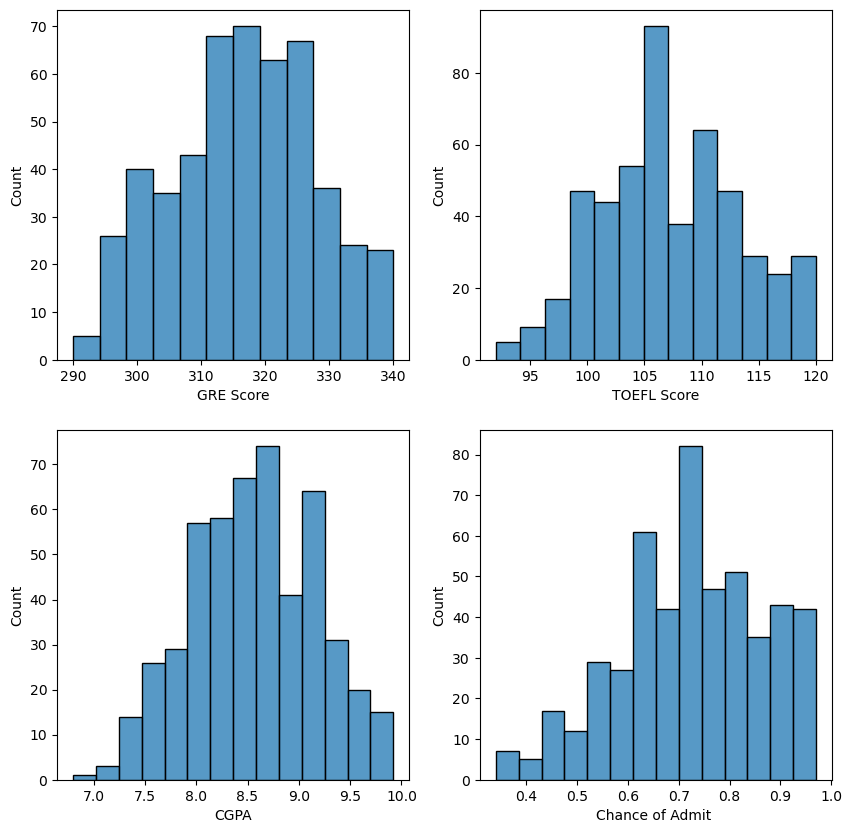

In [48]:
n=1
plt.figure(figsize=(10,10))
for i in df.columns:
    if df[i].nunique()>10:
        plt.subplot(2,2,n)
        sns.histplot(data=df,x=i)
        n+=1

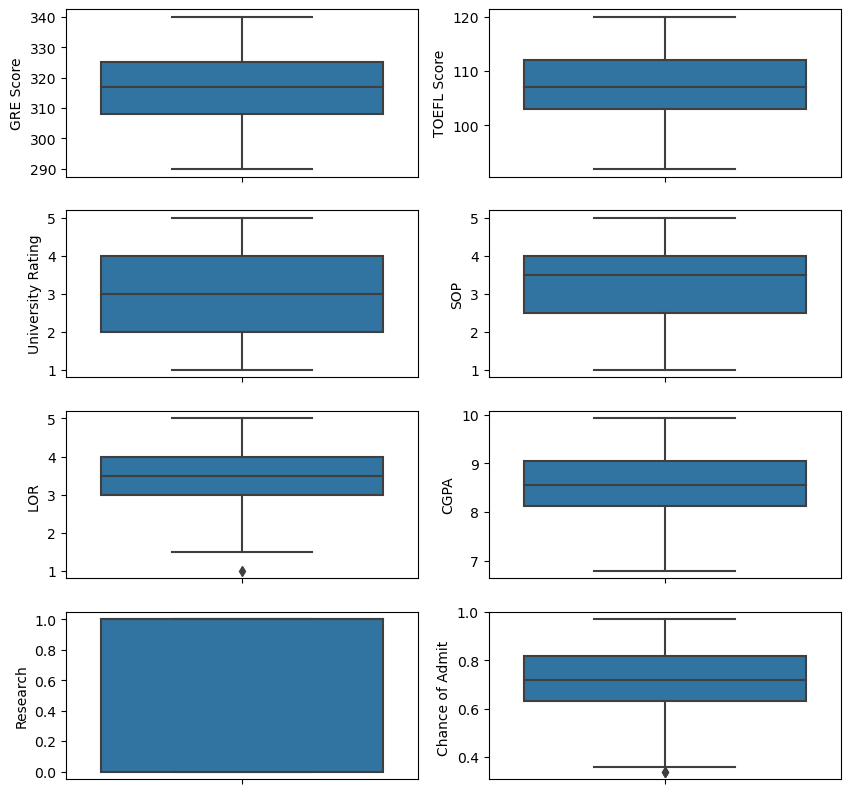

In [49]:
#check for Outliers in each columns
n=1
plt.figure(figsize=(10,10))
for i in df.columns:
    plt.subplot(4,2,n)
    sns.boxplot(data=df,y=i)
    n+=1

Observations:
1.The data is normally distributed.
2.There is no significant number of outliers in each of the columns.
3.Need to do bivariant analysis to get deeper insights on the data

# Bi-Variant Analysis

<AxesSubplot:>

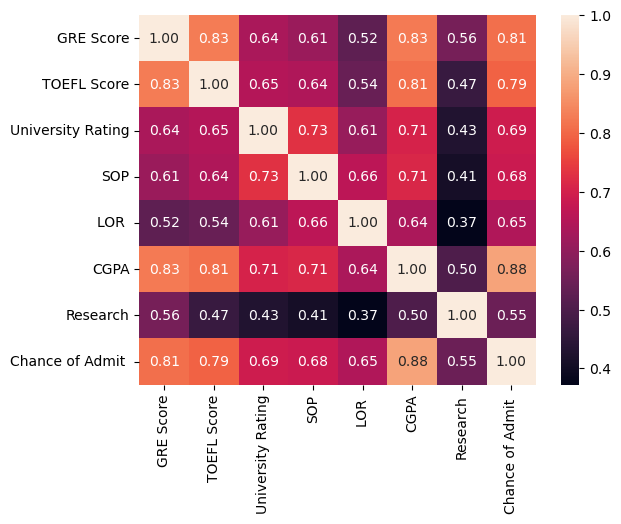

In [50]:
##check correlation between the different variables.
sns.heatmap(df.corr(),annot=True,fmt='.2f')

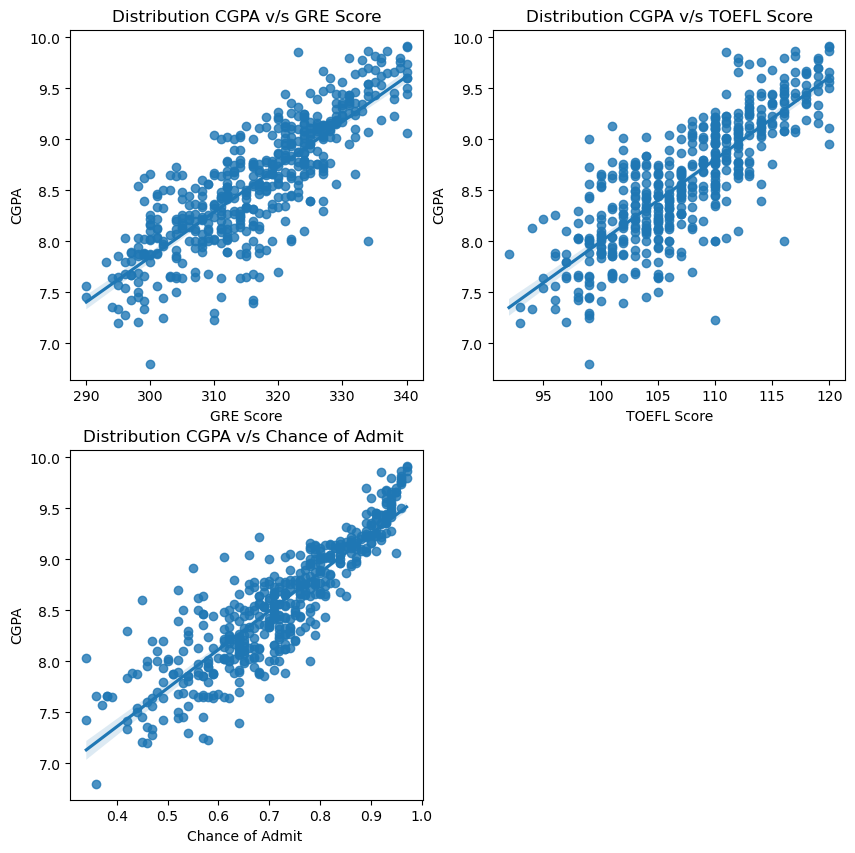

In [51]:
n=1
plt.figure(figsize=(10,10))
for i in ['GRE Score','TOEFL Score','Chance of Admit ']:
    plt.subplot(2,2,n)
    s='Distribution CGPA v/s '+i
    plt.title(s)
    sns.regplot(data=df,y='CGPA',x=i)
    n+=1

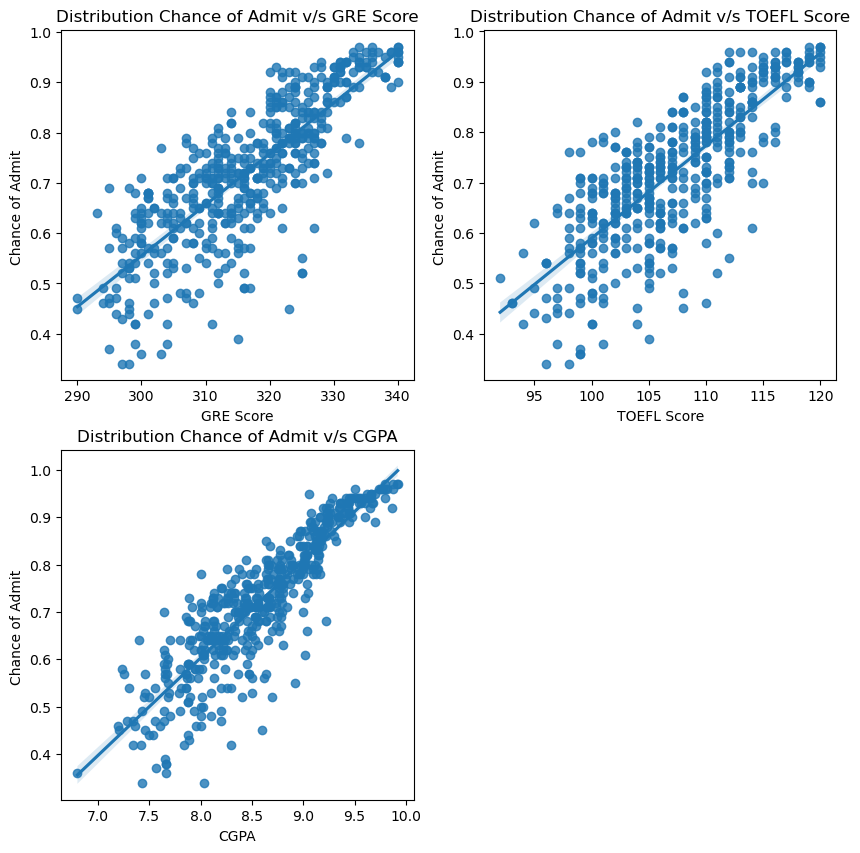

In [52]:
n=1
plt.figure(figsize=(10,10))
for i in ['GRE Score','TOEFL Score','CGPA']:
    plt.subplot(2,2,n)
    s='Distribution Chance of Admit v/s '+i
    plt.title(s)
    sns.regplot(data=df,y='Chance of Admit ',x=i)
    n+=1

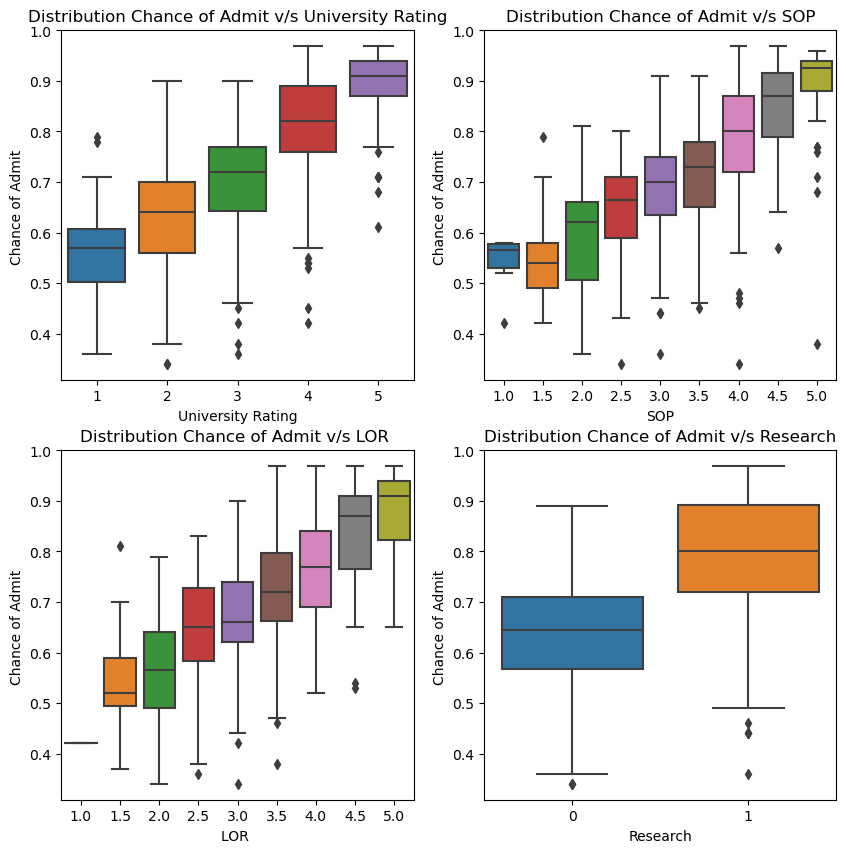

In [53]:
#analysing the median chance of admission to universities based on the categorical variables
df.columns
n=1
plt.figure(figsize=(10,10))
for i in ['University Rating','SOP','LOR ','Research']:
    plt.subplot(2,2,n)
    s='Distribution Chance of Admit v/s '+i
    plt.title(s)
    sns.boxplot(data=df,y='Chance of Admit ',x=i)
    n+=1


### Observations
1.CGPA is highly correlated with TOEFL and GRE scores.The students with good CGPA(good at studies) will have higher chance of scoring good marks in GRE and TOEFL
2.Chance of Admit is highly dependent on the GRE score,TOEFL score and CGPA of the students.
3.Chance of Admission is highly dependent on the CGPA of the students.This can be obsorved by looking at the close proximity of scattered points around the regression line.
4.In this data,categorical variables are ordinal in nature.The median chance of admission will increase with increase in respective variables.
5.With increase in University rank the chance of Admission will increase .Similar for LOR,SOP and Research
6.ttest and Anova tests can be performed on these categorical variables to prove significance difference in mean chance of admission

#  Preparing the data for Linear Regression

In [63]:
X=df.drop(columns='Chance of Admit ')
y=df['Chance of Admit ']

In [65]:
#normalising the input(X) using standard scaler
#Normalisation is done to bring every variable on similar scale.This will help to analyse the influence of each variables.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)
col=X.columns
X=pd.DataFrame(data=scaled_data,columns=col)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


In [81]:
#splitting the data into input(x) and output(y)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [82]:
#check shape of the x_Train,x_test,y_train,y_test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 7)
(100, 7)
(400,)
(100,)


In [83]:
x_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
300,-0.662185,-0.196189,-0.975168,-0.882817,-1.064332,-0.954043,-1.128152
337,1.376126,1.778865,1.650957,1.642404,1.639763,1.478895,0.886405
461,-1.371164,-0.854540,-0.099793,-0.882817,-1.605151,-0.738885,0.886405
325,0.844393,1.449690,-0.099793,0.127271,0.558125,0.932726,0.886405
426,-0.396319,-0.196189,-0.099793,-0.377773,1.639763,-0.010659,-1.128152


In [135]:
##First lets implement the model without checking the effect of multicollinearity .Later,we can remove the MC and check their performance
#implement the linear regression model using OLS function from the statsmodel library and analyse their report.
import statsmodels.api as sm
X_train = sm.add_constant(x_train)
model = sm.OLS(y_train.values, x_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.029
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              1.655
Date:                Sat, 01 Jun 2024   Prob (F-statistic):                       0.119
Time:                        13:58:27   Log-Likelihood:                         -437.04
No. Observations:                 400   AIC:                                      888.1
Df Residuals:                     393   BIC:                                      916.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

<AxesSubplot:ylabel='Count'>

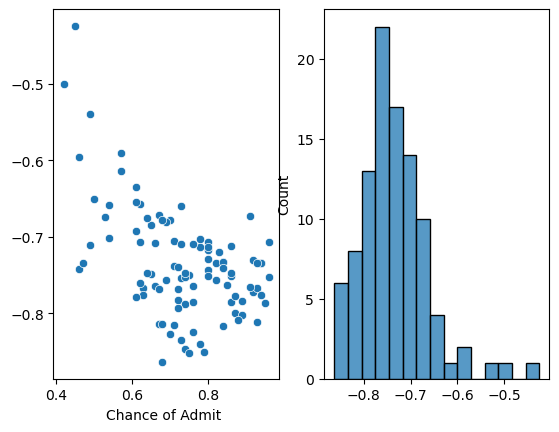

In [136]:
#to check normality and homoskedoscity of the errors
from sklearn.metrics import mean_squared_error
y_pred=model.predict(x_test)
error=y_pred-y_test
plt.subplot(1,2,1)
sns.scatterplot(x=y_test,y=error)
plt.subplot(1,2,2)
sns.histplot(x=error)

## Observations
#### 1.Importance of features in the linear regression model is dependent on coef of the regression line.
#### 2.Based on Observation of coef,CGPA and GRE scores have highest impact on the regression line.
#### 3.CGPA and GRE scores are the most influential features.The chance of admission mainly depends on the CGPA and GRE score

# VIF(variance inflation factor) analysis to detect multicollinearity

In [137]:
##check for multicollinearity in input features
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return vif
vif=calculate_vif(X,[])
vif.sort_values(by='VIF_Value',ascending=False)
#Large vif value indicates the multicollinearity.But in this dataframe the features are fairly independent.So there is no need
#of dropping any feature columns from the input data.

,features,VIF_Value
5,CGPA,4.777992
0,GRE Score,4.464249
1,TOEFL Score,3.904213
3,SOP,2.835210
2,University Rating,2.621036
4,LOR,2.033555
6,Research,1.494008


In [138]:
##Lets try to implement the model using linear regression model from sklearn
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [139]:
co_efficient=model.coef_
for i in range(len(x_train.columns)):
    print(x_train.columns[i],':',co_efficient[i])
# Observation:
#CGPA and GRE score have greater impact on the chance of admission
#feature='SOP' have less impact on the model .So,lets drop the 'SOp' and check the performance.

GRE Score : 0.021767142387506752
TOEFL Score : 0.017257159395815635
University Rating : 0.008722311989080743
SOP : -0.0027934232832049627
LOR  : 0.01602438635769107
CGPA : 0.07206692200402173
Research : 0.012382208526453657


MSE :  0.0037779272654155215
MAE :  0.04336894905013094


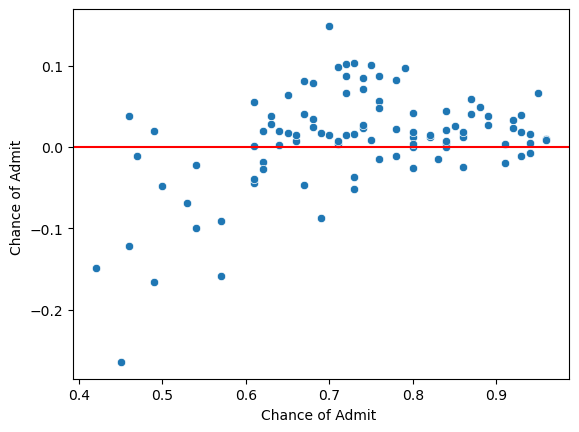

In [140]:
#lets check mean squared error before dropping feature 'SOP' and later we can calculate the MSE after dropping and compare the performances
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred=model.predict(x_test)
error=y_test-y_pred
sns.scatterplot(x=y_test,y=error)
plt.axhline(y=0,color='red')
print('MSE : ',mean_squared_error(y_test,y_pred))
print('MAE : ',mean_absolute_error(y_test,y_pred))

# check Homoscedasticity`

MSE :  0.0037363212863446497
MAE :  0.04310991468354998


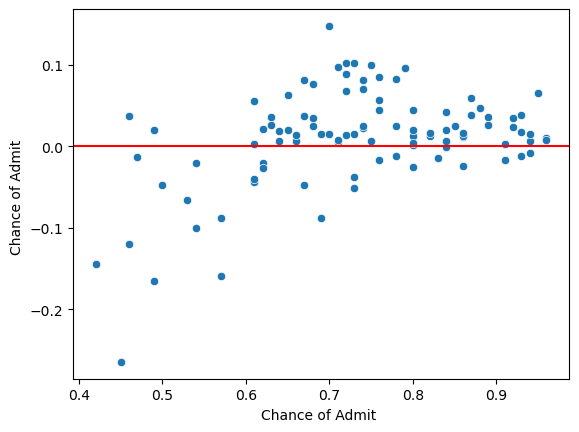

In [141]:
x_train_new=x_train.drop(columns='SOP')
x_test_new=x_test.drop(columns='SOP')
model=LinearRegression()
model.fit(x_train_new,y_train)
y_pred=model.predict(x_test_new)
error=y_test-y_pred
sns.scatterplot(x=y_test,y=error)
plt.axhline(y=0,color='red')
print('MSE : ',mean_squared_error(y_test,y_pred))
print('MAE : ',mean_absolute_error(y_test,y_pred))
#the error is homogenously distributed after chance of admit>0.6
#divergence in the error before 0.6 might be due to lack of data.This deviation can be ignored

### check for normal distribution of the errors

<AxesSubplot:xlabel='Chance of Admit ', ylabel='Count'>

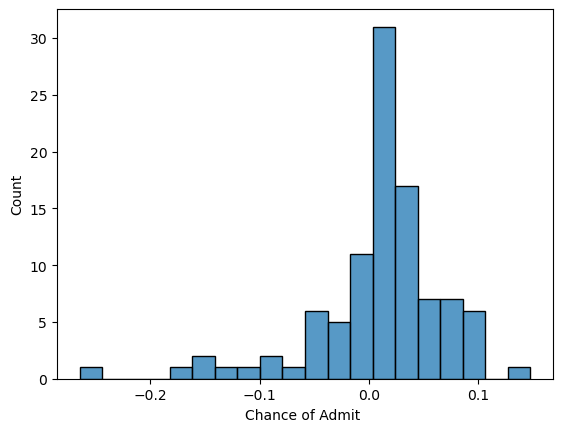

In [142]:
sns.histplot(x=error)
##the errors are normaly distributed.

<AxesSubplot:xlabel='Chance of Admit '>

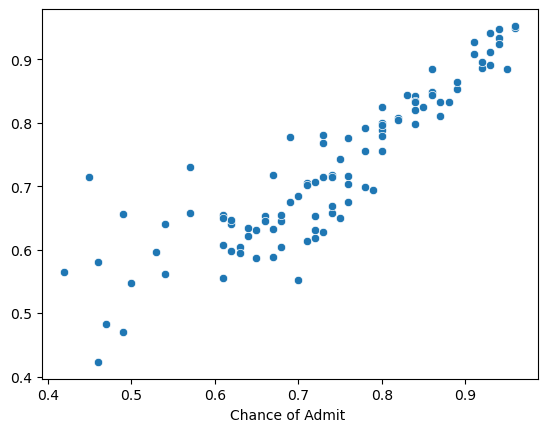

In [143]:
x_test_new=x_test.drop(columns='SOP')
y_pred=model.predict(x_test_new)
sns.scatterplot(y=y_pred,x=y_test)

# Recommendations

#### 1.The chance of getting admission in the university is mainly depending on the CGPA and GRE scores.Need to advice the students to improve their CGPA and GRE score to enhance their chance of getting into good university.
#### 2.Incase of lower CGPA,students can still increase their chance of admission by getting good LOR(letter of reference) and by adding research work to their portfolio.